# "이 사람들 다 어디로 가는거지??"
### 지하철 이용현황 공공데이터 분석

## 여러 개의 엑셀 파일 통합하기 

In [1]:
import pandas as pd

file = './rawfiles/CARD_SUBWAY_MONTH_201901.csv'
data = pd.read_csv(file)
data.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104


In [2]:
data.info() #데이터구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18334 non-null  int64 
 1   노선명     18334 non-null  object
 2   역ID     18334 non-null  int64 
 3   역명      18334 non-null  object
 4   승차총승객수  18334 non-null  int64 
 5   하차총승객수  18334 non-null  int64 
 6   등록일자    18334 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1002.8+ KB


In [3]:
# 2개 파일 합치기 : 판다스의 append함수 이용하는 방법

raw = pd.DataFrame()

file1 = './rawfiles/CARD_SUBWAY_MONTH_201901.csv'
file2 = './rawfiles/CARD_SUBWAY_MONTH_201902.csv'

temp = pd.read_csv(file1)
raw = raw.append(temp) #'raw ='을 입력해야 변경됨

temp = pd.read_csv(file2)
raw = raw.append(temp)

raw

/var/folders/2y/yv2xfmcj2kx33fn_jxtbbw0m0000gn/T/ipykernel_88986/4205824384.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raw = raw.append(temp) #'raw ='을 입력해야 변경됨
/var/folders/2y/yv2xfmcj2kx33fn_jxtbbw0m0000gn/T/ipykernel_88986/4205824384.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raw = raw.append(temp)


,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,경춘선,1323,가평,1520,1436,20190104
1,20190101,경춘선,1322,상천,275,114,20190104
2,20190101,경춘선,1321,청평,1509,1083,20190104
3,20190101,경춘선,1320,대성리,357,271,20190104
4,20190101,경춘선,1319,마석,1772,1963,20190104
...,...,...,...,...,...,...,...
16538,20190228,우이신설선,4709,북한산보국문,6564,6029,20190303
16539,20190228,우이신설선,4710,정릉,4821,4348,20190303
16540,20190228,경춘선,1314,퇴계원,4212,3899,20190303
16541,20190228,우이신설선,4711,성신여대입구(돈암),4058,4452,20190303


In [4]:
# 폴더에 있는 모든 파일 병합하기
import os #폴더/파일을 관리하는 os라이브러리 불러오기

files = os.listdir('./rawfiles/') # os.listdir('파일경로') : 파일경로에 있는 파일 리스트
files

['CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [5]:
raw = pd.DataFrame() #빈데이터프레임 생성

for file in files:
    temp = pd.read_csv('./rawfiles/' + file)
    raw = raw.append(temp) ## 함수 괄호안에서 Shift+Tab 누르면 함수설명 확인가능!!
    
raw.tail()

/var/folders/2y/yv2xfmcj2kx33fn_jxtbbw0m0000gn/T/ipykernel_88986/1371982434.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raw = raw.append(temp) ## 함수 괄호안에서 Shift+Tab 누르면 함수설명 확인가능!!
/var/folders/2y/yv2xfmcj2kx33fn_jxtbbw0m0000gn/T/ipykernel_88986/1371982434.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raw = raw.append(temp) ## 함수 괄호안에서 Shift+Tab 누르면 함수설명 확인가능!!
/var/folders/2y/yv2xfmcj2kx33fn_jxtbbw0m0000gn/T/ipykernel_88986/1371982434.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  raw = raw.append(temp) ## 함수 괄호안에서 Shift+Tab 누르면 함수설명 확인가능!!
/var/folders/2y/yv2xfmcj2kx33fn_jxtbbw0m0000gn/T/ipykernel_88986/1371982434.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
17719,20190630,2호선,204,을지로4가,4940,4668,20190703
17720,20190630,2호선,203,을지로3가,12043,11854,20190703
17721,20190630,2호선,202,을지로입구,31622,29723,20190703
17722,20190630,2호선,201,시청,10178,8214,20190703
17723,20190630,1호선,159,동묘앞,13859,14352,20190703


In [6]:
raw.info() #위의 tail함수 사용했을 때는 마지막 인덱스번호가 17723인데, 데이터구조를 확인하면 총 99342 (이유: 각 파일마다 0부터시작하기 때문)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99342 entries, 0 to 17723
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 6.1+ MB


In [7]:
raw.reset_index(drop=True) #또는 df.append(값, ignore_index=True) :인덱스 무시하고 값 추가

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190301,중앙선,1220,지평,38,49,20190304
1,20190301,중앙선,1219,용문,2804,3073,20190304
2,20190301,중앙선,1218,원덕,439,479,20190304
3,20190301,중앙선,1217,양평,2984,3291,20190304
4,20190301,중앙선,1216,오빈,311,338,20190304
...,...,...,...,...,...,...,...
99337,20190630,2호선,204,을지로4가,4940,4668,20190703
99338,20190630,2호선,203,을지로3가,12043,11854,20190703
99339,20190630,2호선,202,을지로입구,31622,29723,20190703
99340,20190630,2호선,201,시청,10178,8214,20190703


In [8]:
# 요일 추가하기
from datetime import datetime

# datetime.strptime('날짜 문자열', '문자열형태') : 문자타입 -> 날짜타입
# 문자열형태 : %Y(연도4자리), %m(월2자리), %d(일2자리), %H(시간), %M(분), %S(초)

s = '20190630'
date = datetime.strptime(s, '%Y%m%d')
date

datetime.datetime(2019, 6, 30, 0, 0)

In [9]:
# weekday() : 날짜타입 -> 요일(월요일:0~일요일:6)

weekday_dict = ['월','화','수','목','금','토','일']
weekday_index = date.weekday()
print(weekday_index)
print(weekday_dict[weekday_index])

6
일


In [10]:
weekday_dict = ['월','화','수','목','금','토','일']

weekday_list = []

for date_str in raw['사용일자']:
    date = datetime.strptime(str(date_str), '%Y%m%d')
    weekday_index = date.weekday()
    weekday = weekday_dict[weekday_index]
    
    weekday_list.append(weekday) ### list는 대입을 안해줘도 append함수 자체로 변경 (dataframe은 대입해줘야함)
    
raw['요일'] = weekday_list
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190301,중앙선,1220,지평,38,49,20190304,금
1,20190301,중앙선,1219,용문,2804,3073,20190304,금
2,20190301,중앙선,1218,원덕,439,479,20190304,금
3,20190301,중앙선,1217,양평,2984,3291,20190304,금
4,20190301,중앙선,1216,오빈,311,338,20190304,금


In [11]:
raw.sample(10) #raw 데이터프레임에서 임의로 10개 추출

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
12044,20190331,6호선,2635,청구,1898,2002,20190403,일
11921,20190221,중앙선,1217,양평,3505,3414,20190224,목
6676,20190212,7호선,2750,광명사거리,29309,28685,20190215,화
16059,20190529,우이신설선,4710,정릉,5075,4724,20190601,수
14797,20190126,중앙선,1206,도농,7554,6714,20190129,토
8340,20190325,안산선,1761,정왕,11423,12229,20190328,월
6033,20190611,9호선2~3단계,4129,봉은사,17665,17907,20190614,화
14418,20190625,분당선,1852,태평,15796,15335,20190628,화
9652,20190217,1호선,155,동대문,13154,15769,20190220,일
2492,20190315,공항철도 1호선,4207,김포공항,12286,7748,20190318,금


In [12]:
raw = raw[['사용일자','요일','노선명','역ID','역명','승차총승객수','하차총승객수','등록일자']] #컬럼순서 원하는대로 바꾸기
raw

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190301,금,중앙선,1220,지평,38,49,20190304
1,20190301,금,중앙선,1219,용문,2804,3073,20190304
2,20190301,금,중앙선,1218,원덕,439,479,20190304
3,20190301,금,중앙선,1217,양평,2984,3291,20190304
4,20190301,금,중앙선,1216,오빈,311,338,20190304
...,...,...,...,...,...,...,...,...
17719,20190630,일,2호선,204,을지로4가,4940,4668,20190703
17720,20190630,일,2호선,203,을지로3가,12043,11854,20190703
17721,20190630,일,2호선,202,을지로입구,31622,29723,20190703
17722,20190630,일,2호선,201,시청,10178,8214,20190703


In [13]:
# 저장하기
fpath = './data/subway_raw.xlsx'
raw.to_excel(fpath, index=False)

## 일자별 승객 수 살펴보기 

In [14]:
import pandas as pd

fpath = './data/subway_raw.xlsx'
raw = pd.read_excel(fpath)
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190301,금,중앙선,1220,지평,38,49,20190304
1,20190301,금,중앙선,1219,용문,2804,3073,20190304
2,20190301,금,중앙선,1218,원덕,439,479,20190304
3,20190301,금,중앙선,1217,양평,2984,3291,20190304
4,20190301,금,중앙선,1216,오빈,311,338,20190304


In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


In [16]:
# 가장 승객이 많은 날짜?

#사용일자/요일별 승차승객수 합계 피벗테이블 -> 승객수 기준으로 내림차순 정렬
raw.pivot_table(index=['사용일자','요일'], values = '승차총승객수', aggfunc ='sum').sort_values(by='승차총승객수', ascending=False)
# => 위의 데이터가 5월이고 금요일인 것이 많다.

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


In [17]:
#가정1 - 5월에 승객수가 많다?
#연월/월일 데이터
ym_list = []
md_list = []
for date in raw['사용일자']:
    ym = str(date)[:6]
    ym_list.append(ym)
    md = str(date)[4:]
    md_list.append(md)
    
raw['연월'] = ym_list
raw['월일'] = md_list

raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190301,금,중앙선,1220,지평,38,49,20190304,201903,0301
1,20190301,금,중앙선,1219,용문,2804,3073,20190304,201903,0301
2,20190301,금,중앙선,1218,원덕,439,479,20190304,201903,0301
3,20190301,금,중앙선,1217,양평,2984,3291,20190304,201903,0301
4,20190301,금,중앙선,1216,오빈,311,338,20190304,201903,0301


In [18]:
#월별 승객수 정리
raw.pivot_table(index = '연월', values = '승차총승객수', aggfunc = 'sum').sort_values(by='승차총승객수', ascending=False)
# => 5월에 승객수가 많다!

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812
201903,157782643


In [19]:
#가정2 - 금요일에 승객수가 많다?

#요일별 승객수
pd.pivot_table(data=raw, index ='요일', values='승차총승객수', aggfunc='sum').sort_values(by='승차총승객수',ascending=False)
# => 금요일에 승객수가 많다!

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


In [20]:
#월별로 편차가 존재할까?

#1개월로 먼저
ym = '201901'
select = raw[ raw['연월']==ym ]

select = select.pivot_table(index=['월일','요일'], values = '승차총승객수', aggfunc='sum').reset_index()
select.head()

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294


In [21]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False


<AxesSubplot:xlabel='월일', ylabel='승차총승객수'>

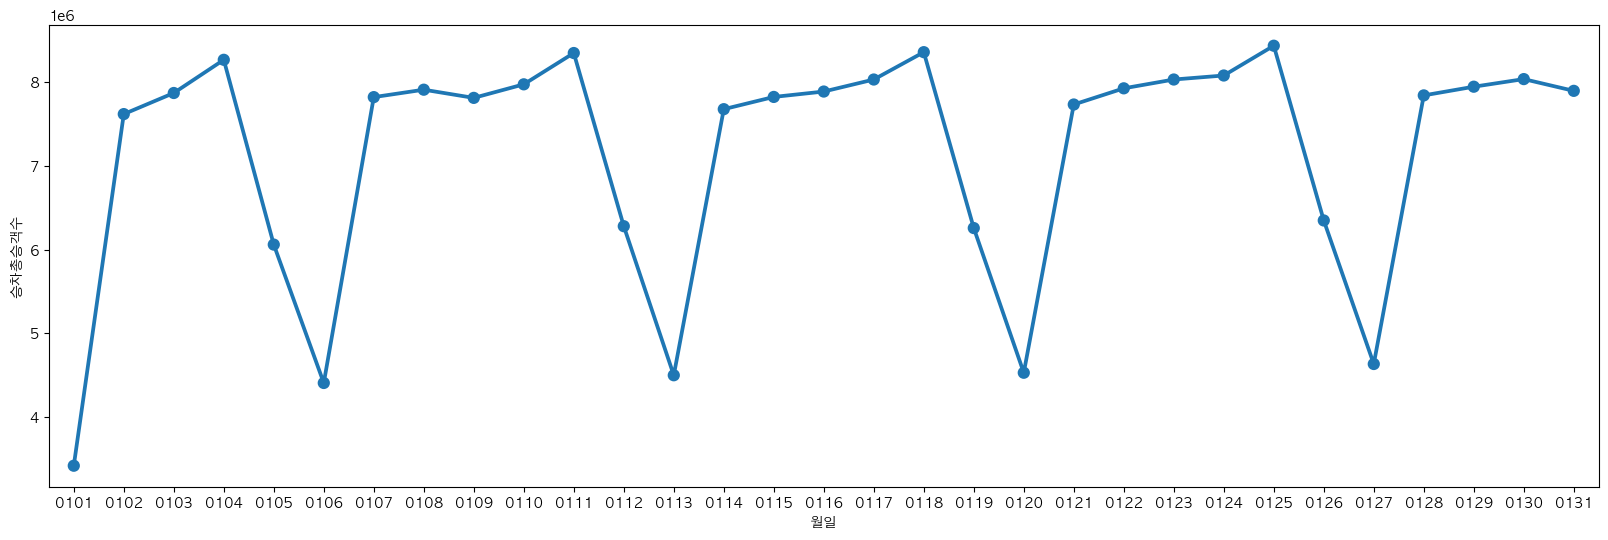

In [22]:
#일자별 승객수를 그래프로
fig, ax = plt.subplots(figsize=(20,6))
sns.pointplot(data=select, x='월일', y='승차총승객수')

In [54]:
raw['연월'].sort_values().unique()

array(['201901', '201902', '201903', '201904', '201905', '201906'],
      dtype=object)

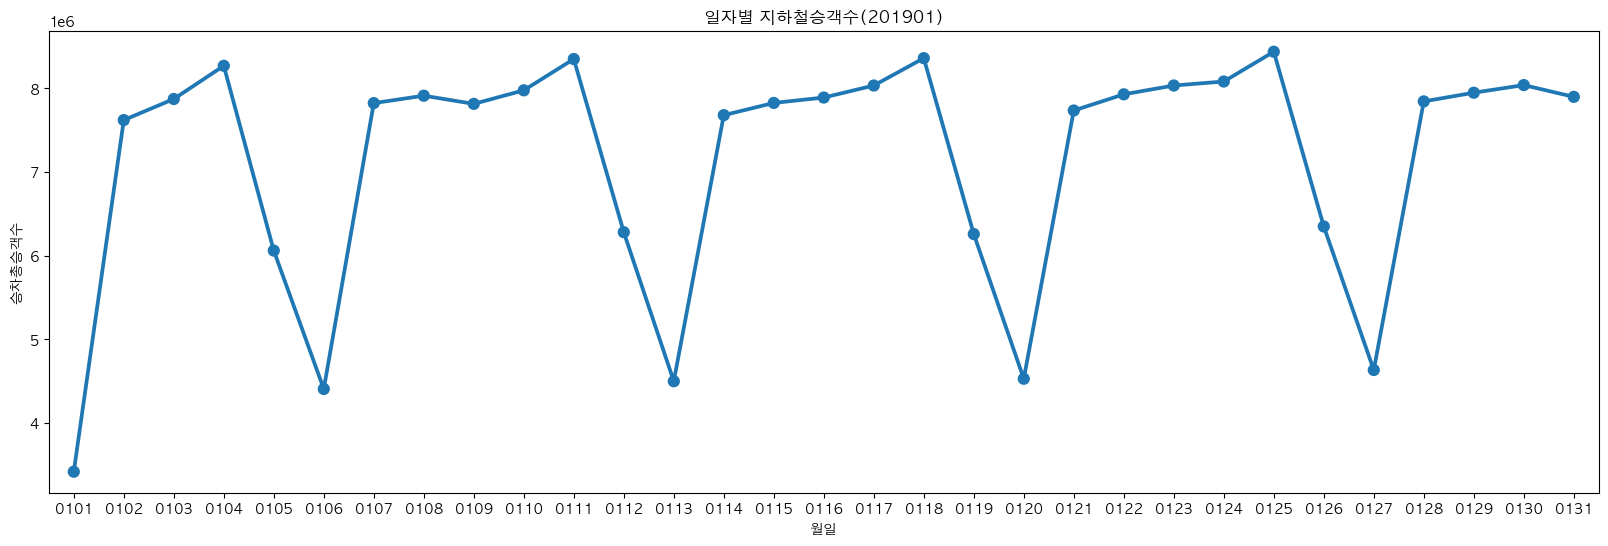

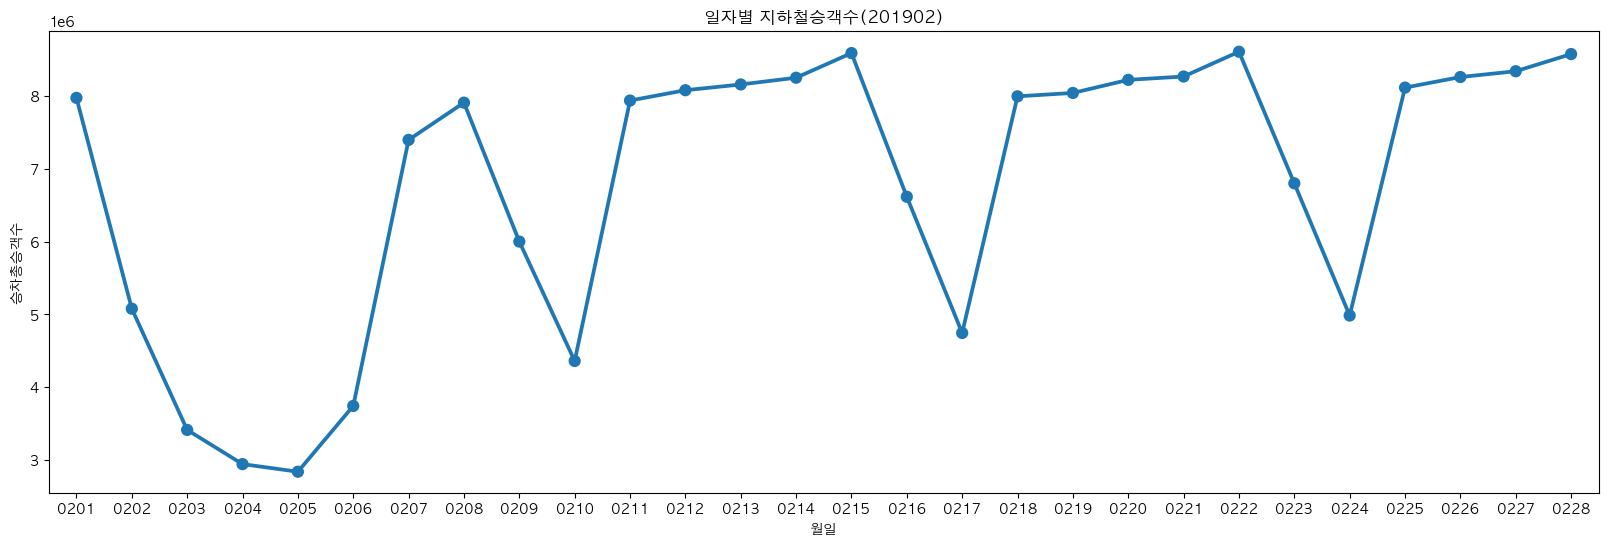

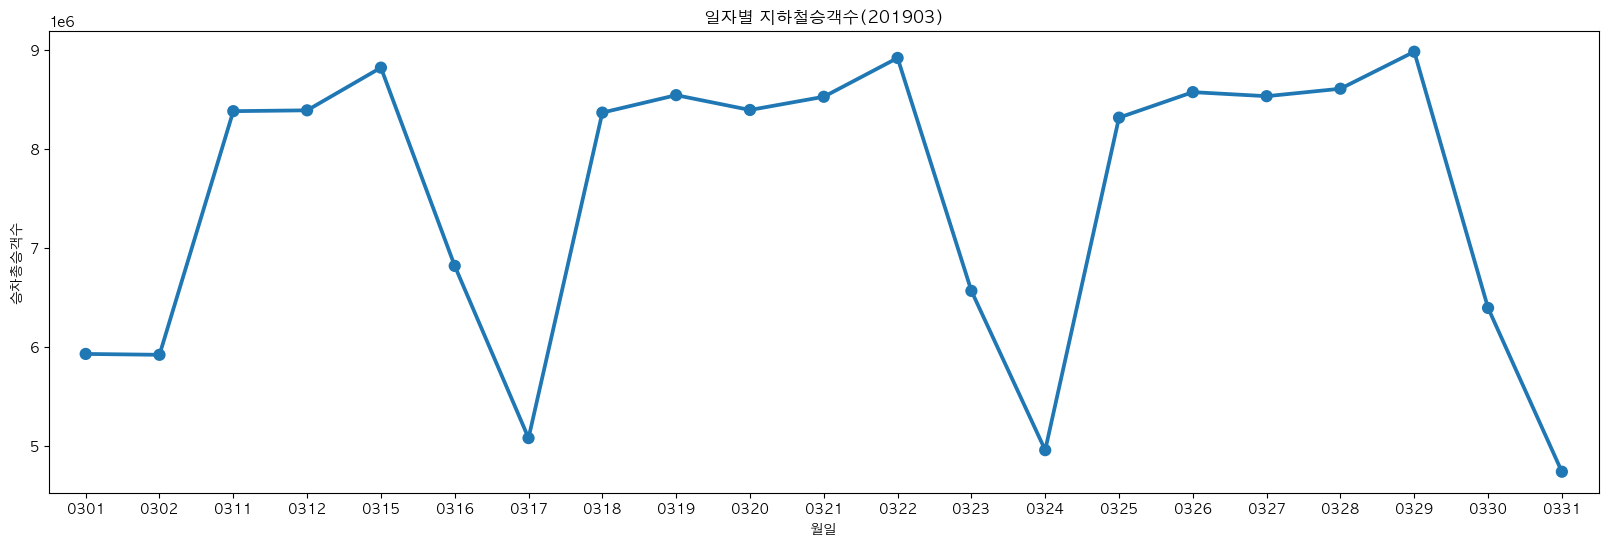

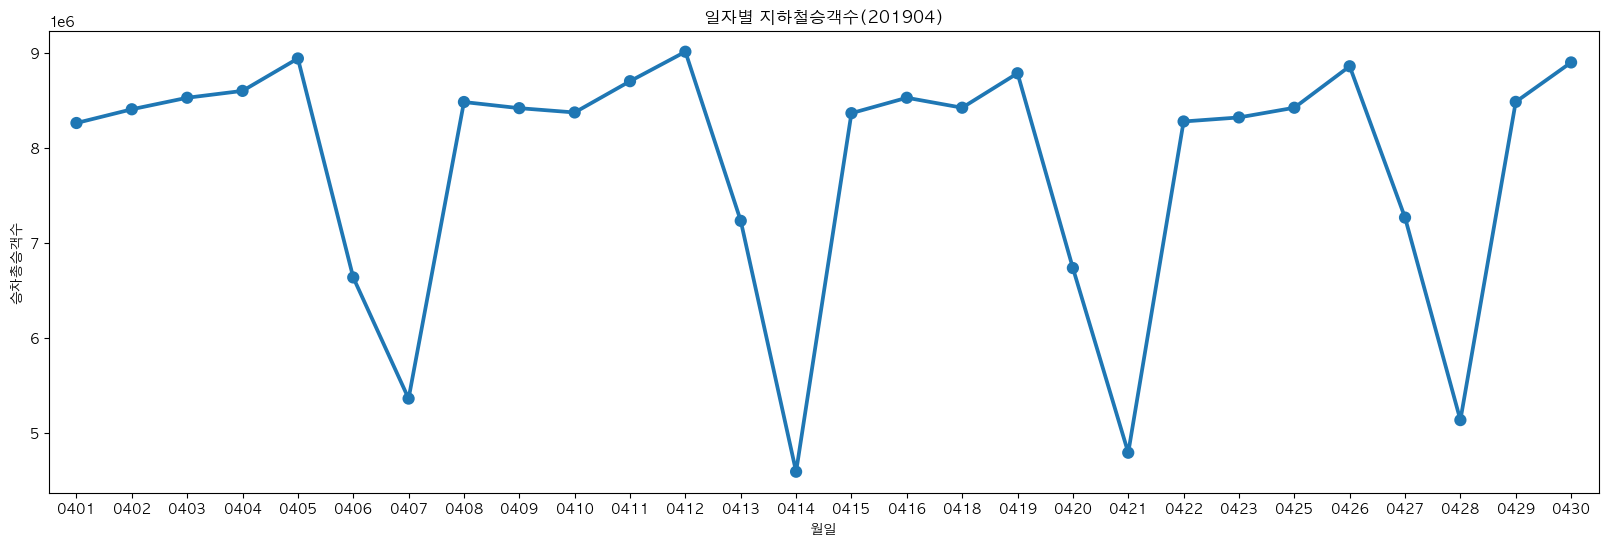

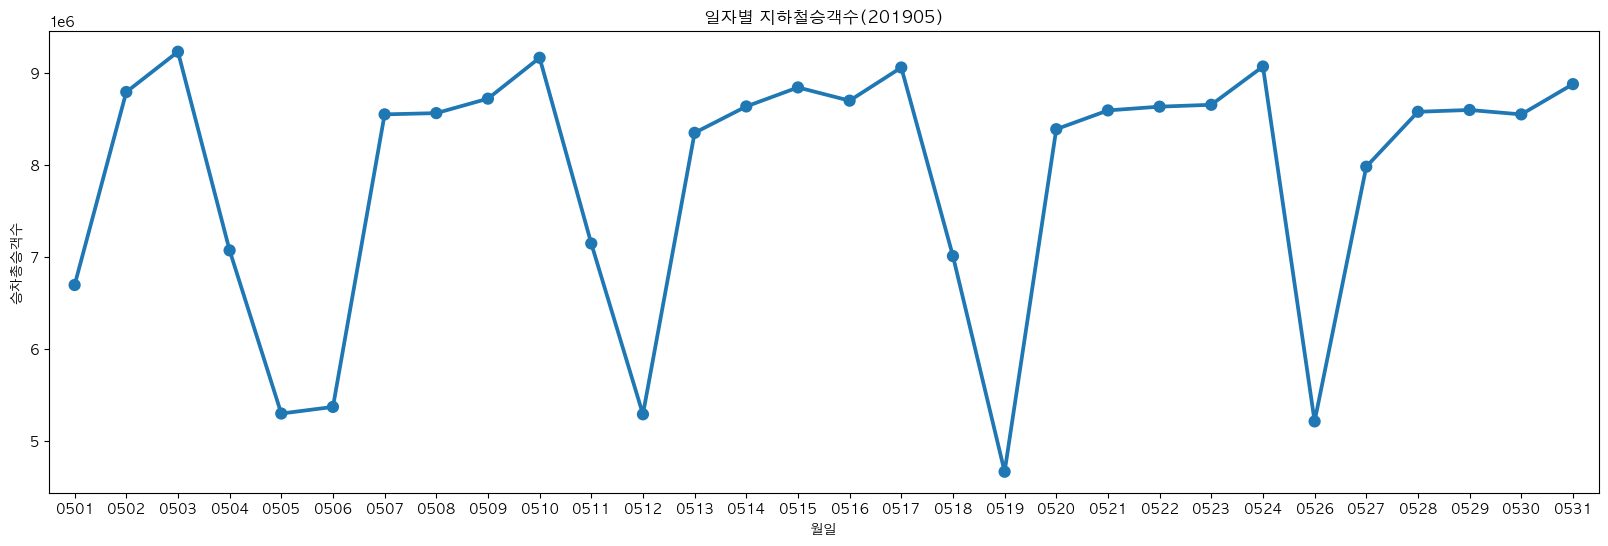

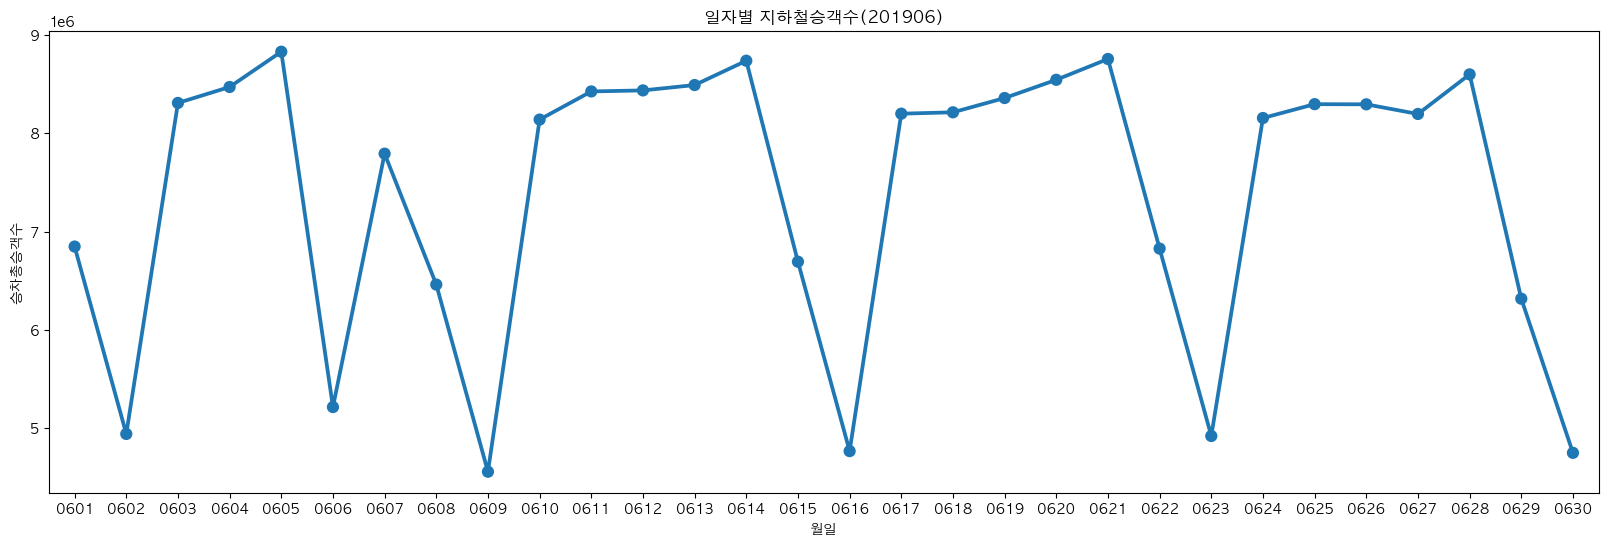

In [55]:
#모든 월을 대상으로

for ym in raw['연월'].sort_values().unique():
    select = raw[ raw['연월']==ym ]
    pv = select.pivot_table(index=['월일','요일'], values = '승차총승객수', aggfunc='sum').reset_index()
    
    fig, ax = plt.subplots(figsize = (20,6))
    
    ax.set_title(f'일자별 지하철승객수({ym})')
    sns.pointplot(data=pv, x='월일', y='승차총승객수')


## 일자별 승객수 (심화)

In [24]:
# 일자별/역별 승객수 데이터
fpath = './data/subway_raw.xlsx'
data = pd.read_excel(fpath)
data.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190301,금,중앙선,1220,지평,38,49,20190304
1,20190301,금,중앙선,1219,용문,2804,3073,20190304
2,20190301,금,중앙선,1218,원덕,439,479,20190304
3,20190301,금,중앙선,1217,양평,2984,3291,20190304
4,20190301,금,중앙선,1216,오빈,311,338,20190304


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


In [26]:
# 가장 승객이 많이 타는 역은?
#역명별 승객수 데이터, 내림차순
station = data.pivot_table(index='역명', values='승차총승객수', aggfunc = 'sum')
station = station.sort_values(by='승차총승객수', ascending=False)
station.head(10)

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


In [27]:
# 노선별로 역별/요일별 승객수 비교
#한 노선(1호선) 데이터로 역별/요일별 승객수 데이터
line = '1호선'
data_l = data[ data['노선명']==line]
data_l

data_p = data_l.pivot_table(index=['역명','역ID'], values='승차총승객수', aggfunc='sum', columns='요일') #역별/요일별 승객수(역ID는 역 순서)
data_p = data_p[['월','화','수','목','금','토','일']] #원하는 순서로 열정렬
data_p = data_p.sort_values(by='역ID')
data_p = data_p / 10000 #만명단위 승객수
data_p

,요일,월,화,수,목,금,토,일
역명,역ID,,,,,,,
서울역,150,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
시청,151,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
종각,152,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
종로3가,153,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
종로5가,154,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
동대문,155,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
신설동,156,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
제기동,157,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
청량리(서울시립대입구),158,63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


<AxesSubplot:title={'center':'1호선 역별/요일별 승객수'}, xlabel='요일', ylabel='역명-역ID'>

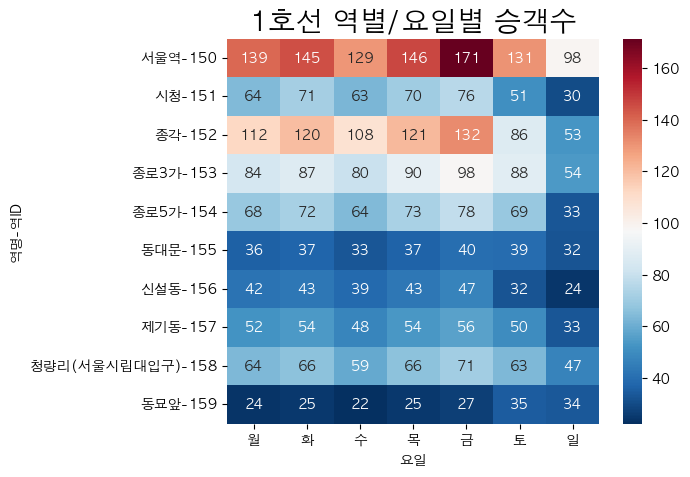

In [28]:
#시각화하기

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False
###############################################################

fig,ax = plt.subplots(figsize=(6,5)) #(가로사이즈,세로사이즈)
plt.title(f'{line} 역별/요일별 승객수', fontsize=20)
sns.heatmap(data_p, cmap='RdBu_r', annot=True, fmt='.0f')

In [29]:
#1호선~9호선 노선 데이터
line_list = []
for line in data['노선명'].unique():
#     print(line)
    if line[1:] == '호선': # 마지막 두자리가 호선
        print(line)
        line_list.append(line)
        
line_list

1호선
2호선
3호선
4호선
5호선
6호선
7호선
8호선
9호선


['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']

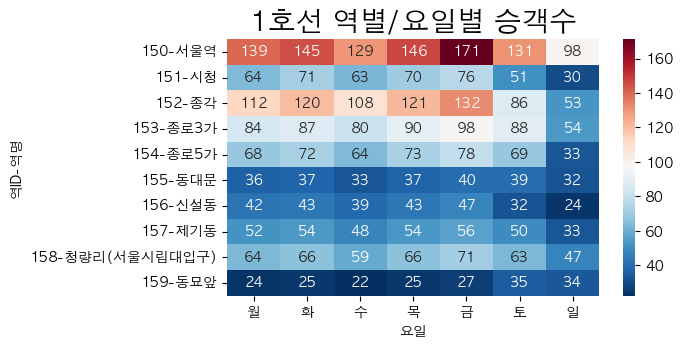

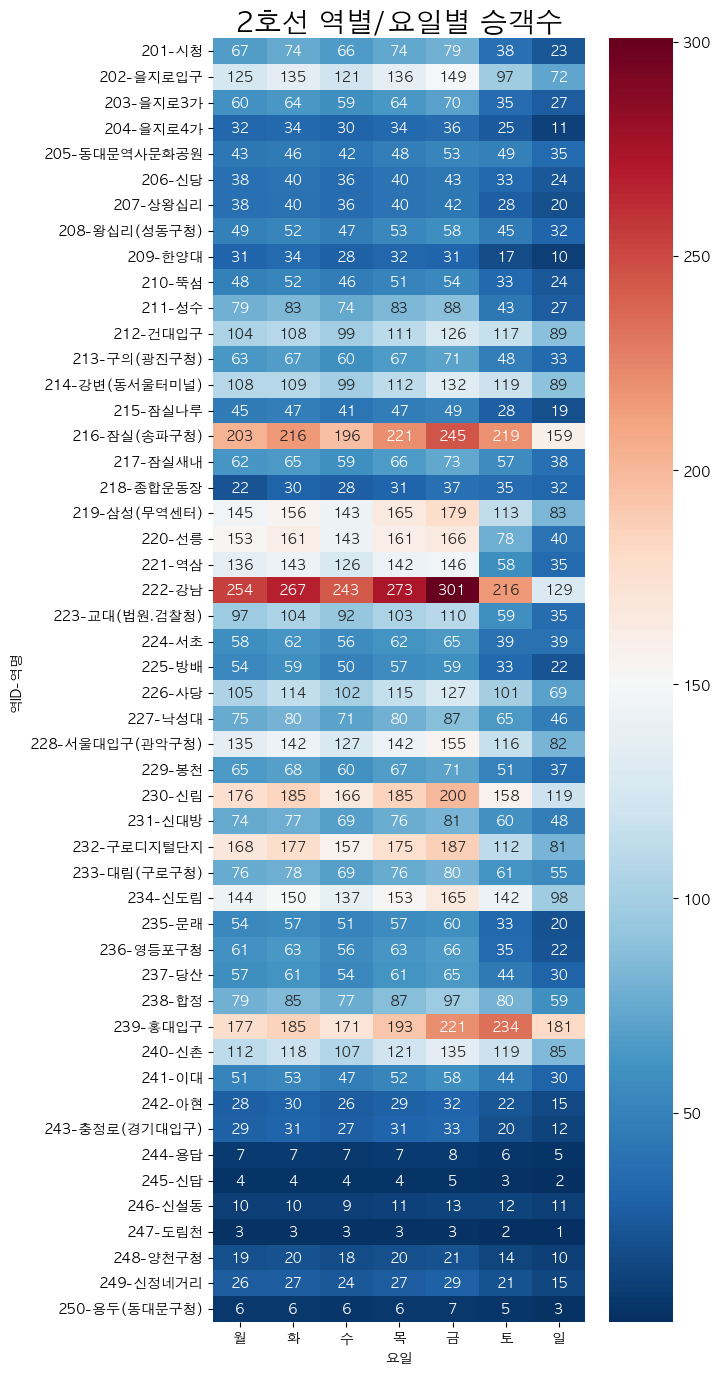

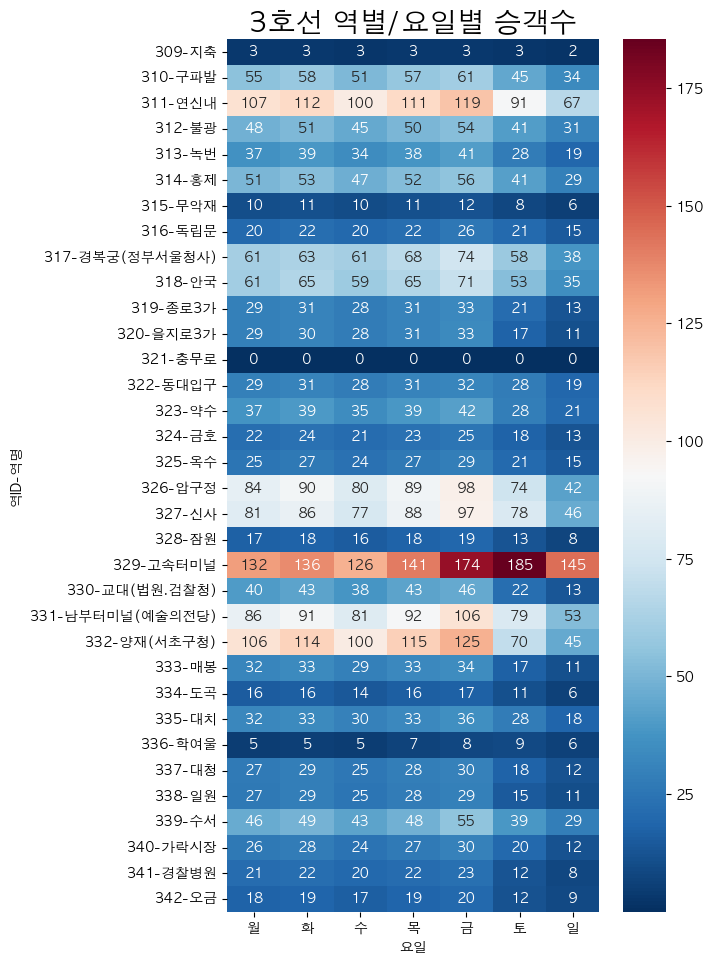

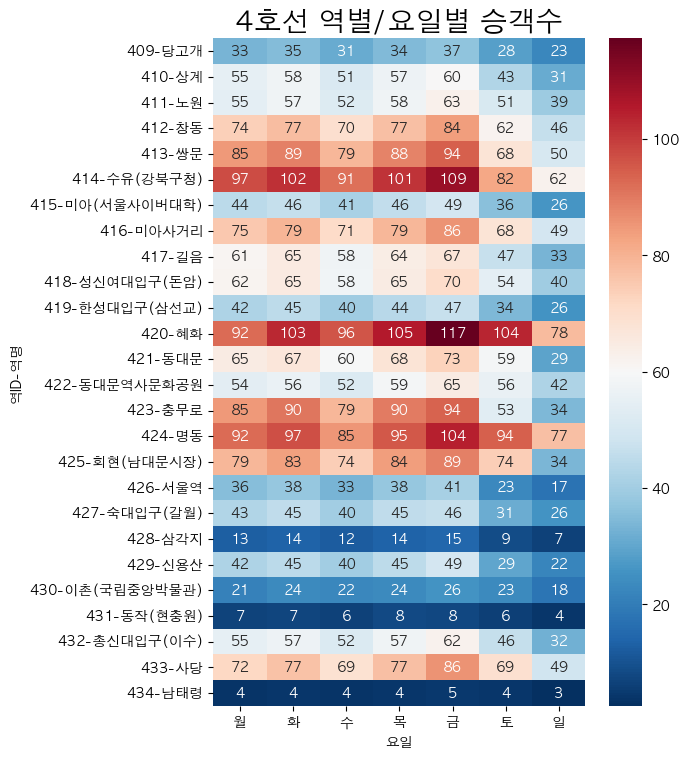

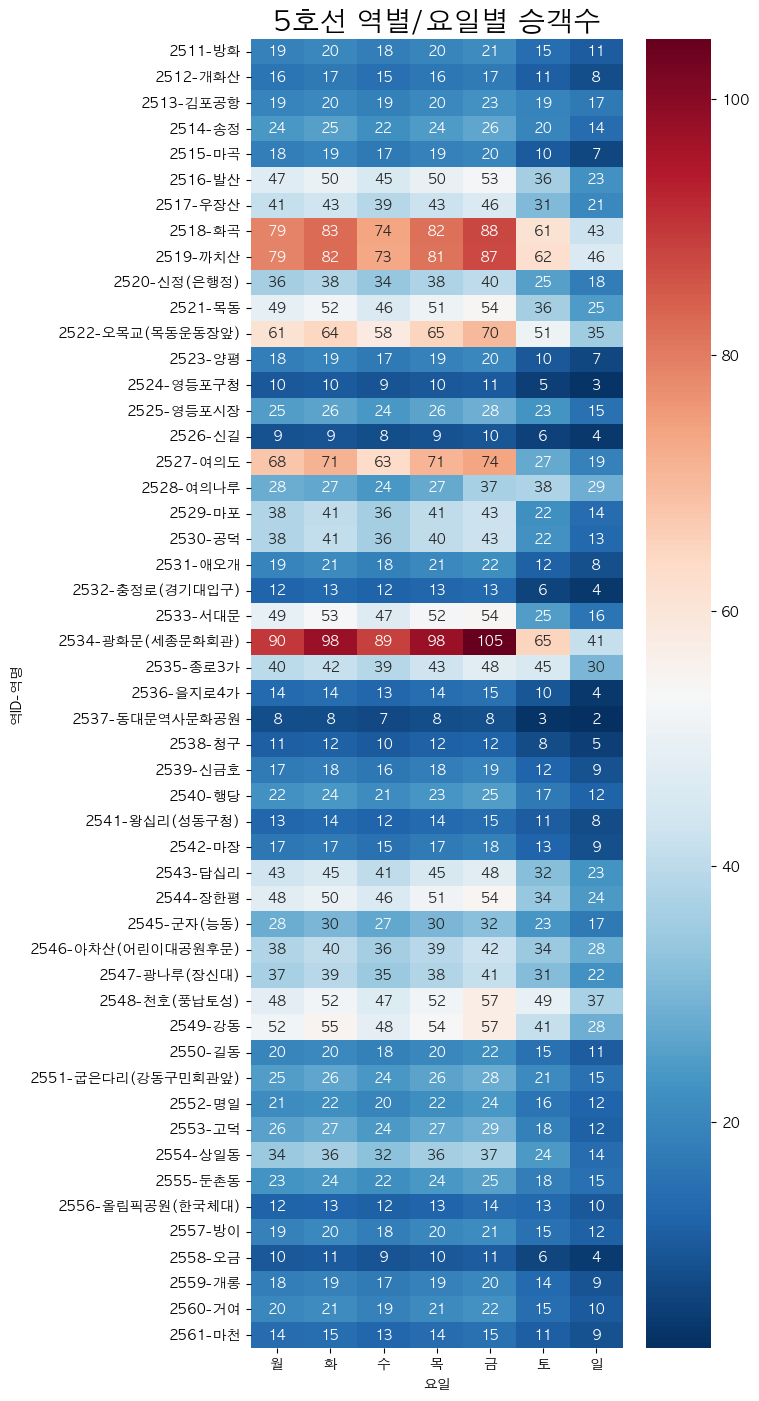

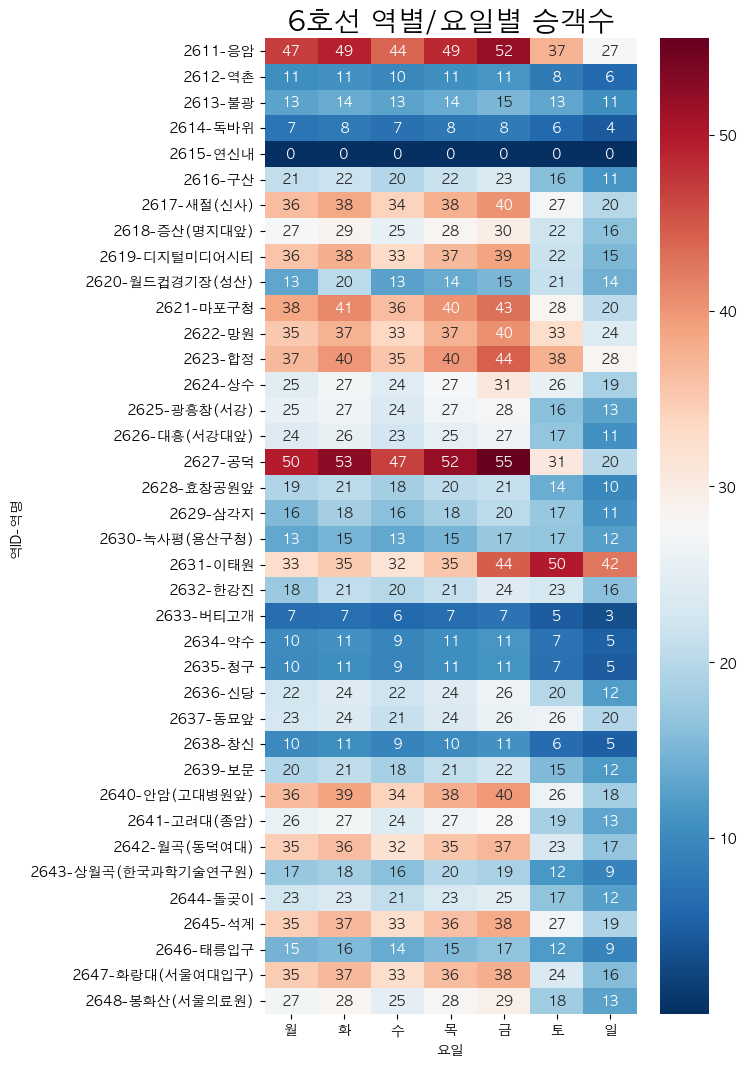

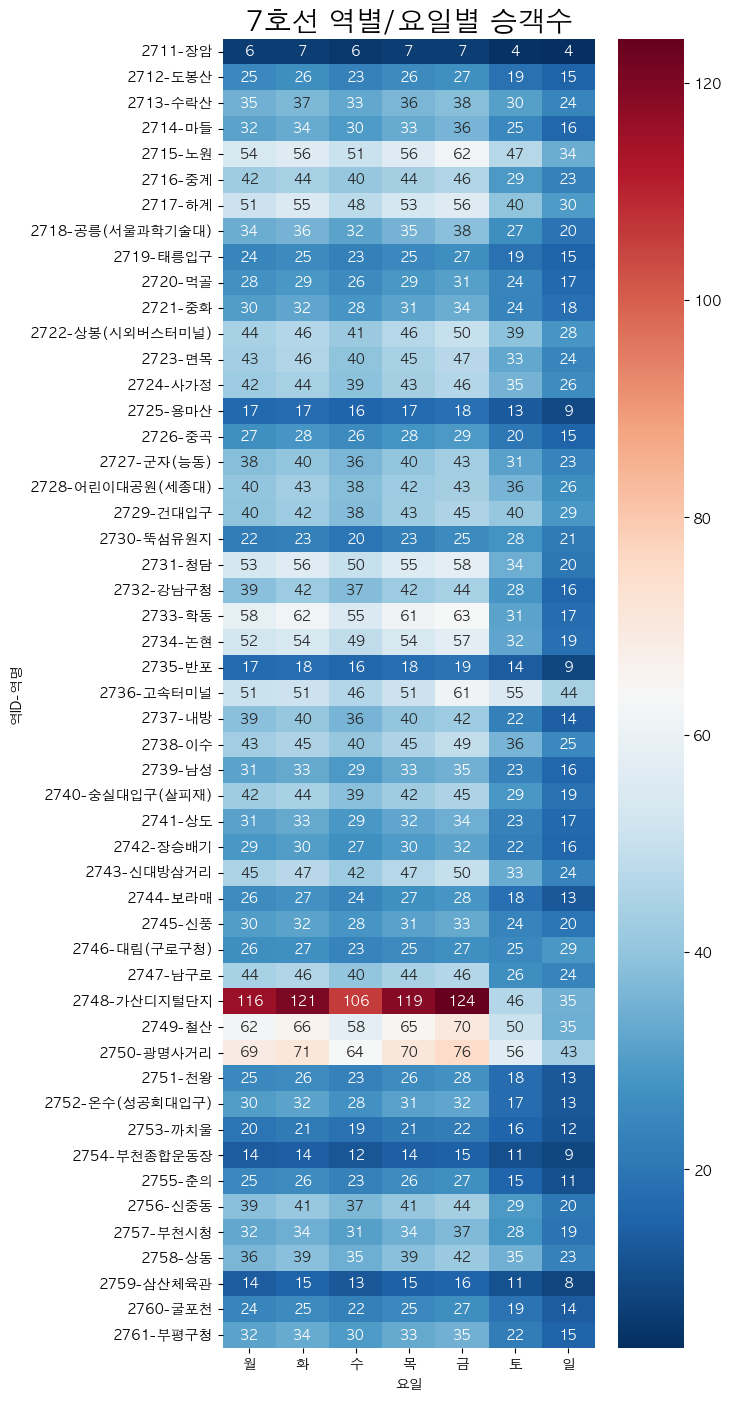

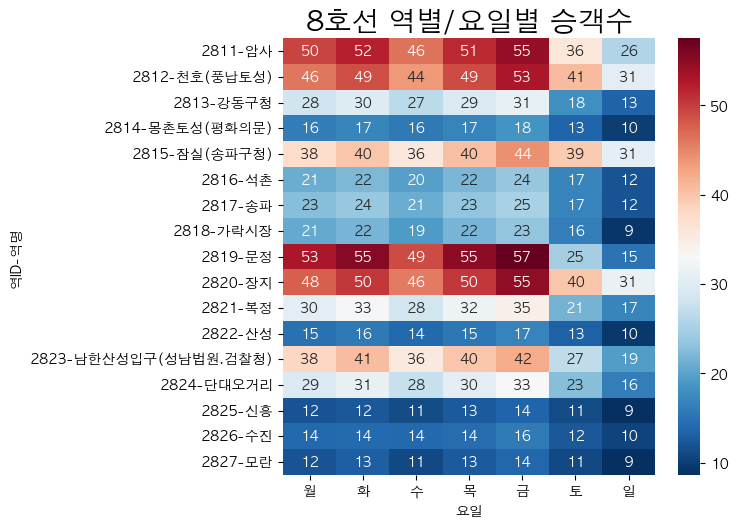

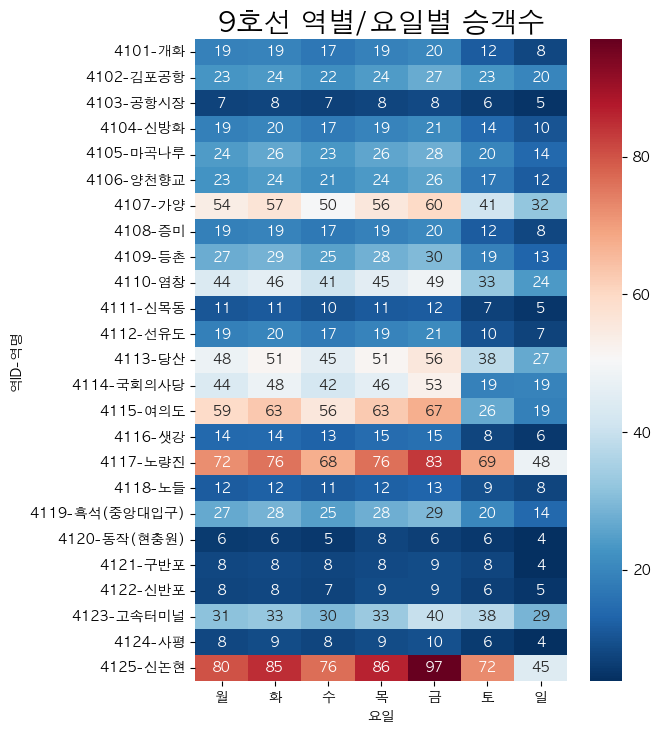

In [56]:

for line in line_list:

    data_l = data[ data['노선명']==line]

    data_p = data_l.pivot_table(index=['역ID', '역명'], values='승차총승객수', aggfunc='sum', columns='요일') #역별/요일별 승객수(역ID는 역 순서)
    data_p = data_p[['월','화','수','목','금','토','일']] #원하는 순서로 열정렬
    data_p = data_p / 10000 #만명단위 승객수

    fig,ax = plt.subplots(figsize=(6,len(data_p)/3)) #(가로사이즈,세로사이즈)
    plt.title(f'{line} 역별/요일별 승객수', fontsize=20)
    sns.heatmap(data_p, cmap='RdBu_r', annot=True, fmt='.0f')


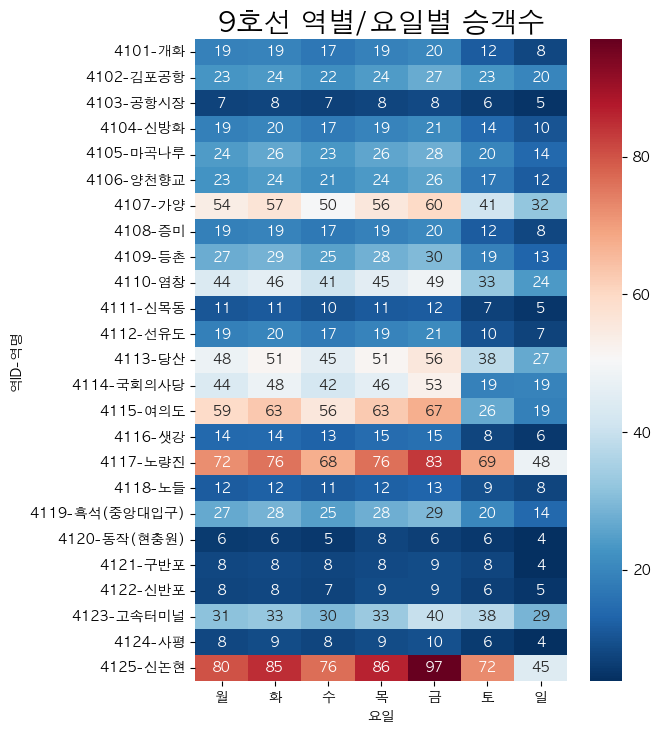

In [59]:
fig